In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [24]:
X = np.load('./Cropped_data/data_X.npz')
X_train = X['train']
X_test = X['test']
X_val = X['val']

In [25]:
# mean face of the training set
mean_face = X_train.mean(axis=0)
print(mean_face.shape)

(10000,)


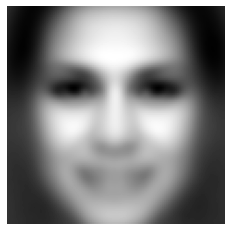

In [26]:
plt.imshow(mean_face.reshape(100,100).astype('float32'),cmap='gray')
plt.axis('off')
plt.show()

In [27]:
X_train_m = X_train - mean_face

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500,whiten=True,svd_solver='auto')
pca.fit(X_train_m)

PCA(n_components=500, whiten=True)

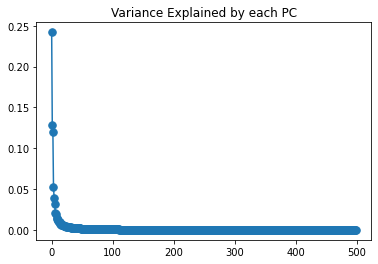

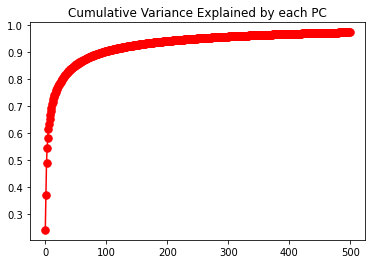

In [29]:
exp = pca.explained_variance_ratio_
plt.plot(exp, '.-', ms=15)
plt.title('Variance Explained by each PC');
plt.show()

plt.plot(np.cumsum(exp), '.-', ms=15, color='red')
plt.title('Cumulative Variance Explained by each PC');
plt.show()

From the above plots, we can see 50 components can achieve a approximiately 90% cummulative explained variance.

In [30]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto')
pca_train = pca_50.fit_transform(X_train_m)

In [31]:
pca_train.shape

(8686, 50)

In [32]:
# do the same transformation for testing and validation set
X_test_m = X_test - mean_face
X_val_m = X_val - mean_face

pca_test = pca_50.transform(X_test_m)
pca_val = pca_50.transform(X_val_m)

In [33]:
np.savez_compressed('/content/drive/MyDrive/Gender Classification/data_pca_X', train=pca_train, test=pca_test, val=pca_val)

In [34]:
import pickle
pca_dict = {'pca':pca_50,'mean_face':mean_face}

pickle.dump(pca_dict,open('./Model/pca_50.pickle',"wb"))

### Visualize Eigen Images

In [35]:
pca_data_inv = pca_50.inverse_transform(pca_train)
print(pca_data_inv.shape)
eig_img = pca_data_inv[0,:].reshape((100,100))
print(eig_img.shape)

(8686, 10000)
(100, 100)


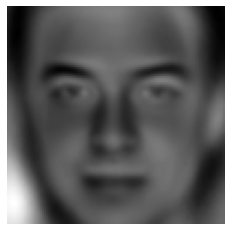

In [36]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')
plt.show()

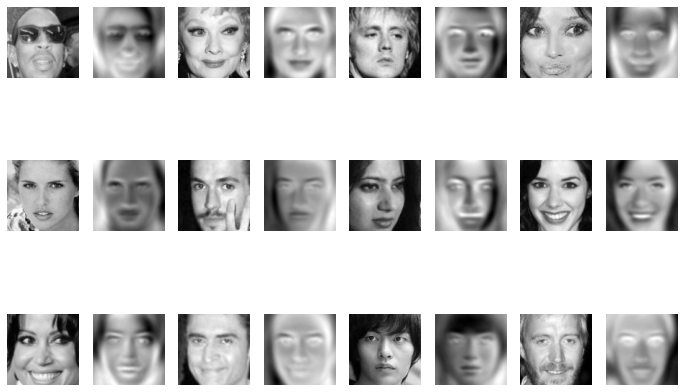

In [48]:
np.random.seed(10)
rand = np.random.randint(0,8686,12)

plt.figure(figsize=(12,8))

for i,pic in enumerate(rand):
    plt.subplot(3,8,(i+1)*2-1)
    img = X_train[pic:pic+1].reshape(100,100).astype('float32')
    plt.axis('off')
    plt.imshow(img,cmap='gray')
    plt.subplot(3,8,(i+1)*2)
    eig = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.axis('off')
    plt.imshow(eig,cmap='gray')
plt.show()